In [1]:
import pandas as pd

# Offline RL

## CQL

In [2]:
dftemp_CQL = pd.concat([pd.read_csv("CQL_account_value_seed_11.csv.gz",index_col="date"),
    pd.read_csv("CQL_account_value_seed_22.csv.gz",index_col="date"),
    pd.read_csv("CQL_account_value_seed_33.csv.gz",index_col="date")
    ],axis=1)

In [3]:
dftemp_CQL.columns = ["11","22","33"]

In [4]:
cql_mean_11 = dftemp_CQL["11"].mean()
cql_mean_22 = dftemp_CQL["22"].mean()
cql_mean_33 = dftemp_CQL["33"].mean()
print("CQL Seed 11 Mean: ", cql_mean_11, ", CQL Seed 22 Mean: ", cql_mean_22, ", CQL Seed 33 Mean: ", cql_mean_33)

CQL Seed 11 Mean:  132973691.88932593 , CQL Seed 22 Mean:  139136678.44610423 , CQL Seed 33 Mean:  134725342.41510722


<AxesSubplot:xlabel='date'>

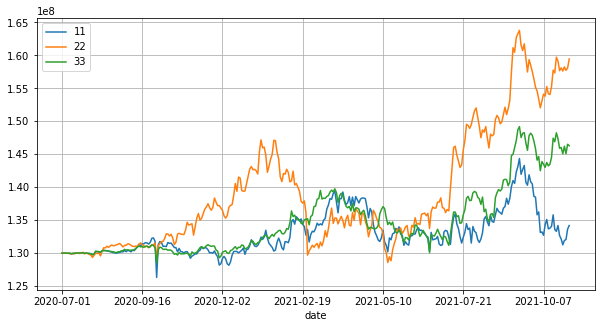

In [5]:
dftemp_CQL.plot(grid=True,figsize = (10,5))

## IQL

In [6]:
dftemp_IQL = pd.concat([pd.read_csv("IQL_account_value_seed_11.csv.gz",index_col="date"),
    pd.read_csv("IQL_account_value_seed_22.csv.gz",index_col="date"),
    pd.read_csv("IQL_account_value_seed_33.csv.gz",index_col="date")
    ],axis=1)

In [7]:
dftemp_IQL.columns = ["11","22","33"]

In [8]:
iql_mean_11 = dftemp_IQL["11"].mean()
iql_mean_22 = dftemp_IQL["22"].mean()
iql_mean_33 = dftemp_IQL["33"].mean()
print("IQL Seed 11 Mean: ", iql_mean_11, ", IQL Seed 22 Mean: ", iql_mean_22, ", IQL Seed 33 Mean: ", iql_mean_33)

IQL Seed 11 Mean:  135617791.38519245 , IQL Seed 22 Mean:  131299348.69604418 , IQL Seed 33 Mean:  132554680.8317319


<AxesSubplot:xlabel='date'>

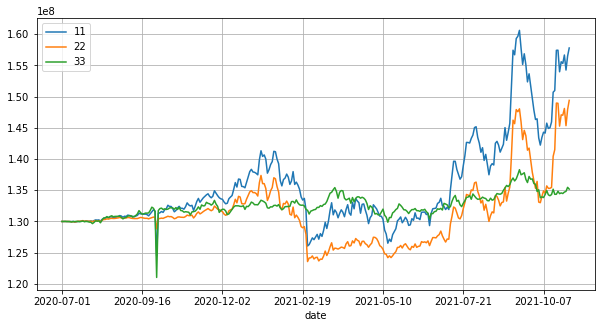

In [9]:
dftemp_IQL.plot(grid=True,figsize = (10,5))

## Baselines

In [10]:
dftemp_baselines = pd.concat([pd.read_csv("a2c_account_value.csv.gz",index_col="date"),
    pd.read_csv("ddpg_account_value.csv.gz",index_col="date"),
    pd.read_csv("PPO_account_value.csv.gz",index_col="date"),
    pd.read_csv("TD3_account_value.csv.gz",index_col="date"),
    pd.read_csv("SAC_account_value.csv.gz",index_col="date")
    ],axis=1)

In [11]:
dftemp_baselines.columns = ["a2c","ddpg","ppo", "td3", "sac"]

In [12]:
a2c_mean = dftemp_baselines["a2c"].mean()
ddpg_mean = dftemp_baselines["ddpg"].mean()
ppo_mean = dftemp_baselines["ppo"].mean()
td3_mean = dftemp_baselines["td3"].mean()
sac_mean = dftemp_baselines["sac"].mean()
print("A2c Mean: ", a2c_mean, ", DDPG Mean: ", ddpg_mean, ", PPO Mean: ", ppo_mean, ", TD3 Mean: ", td3_mean, ", SAC Mean: ", sac_mean)

A2c Mean:  134942241.64659244 , DDPG Mean:  135317502.39914718 , PPO Mean:  130976457.60121562 , TD3 Mean:  136145496.46014914 , SAC Mean:  133972163.4944226


<AxesSubplot:xlabel='date'>

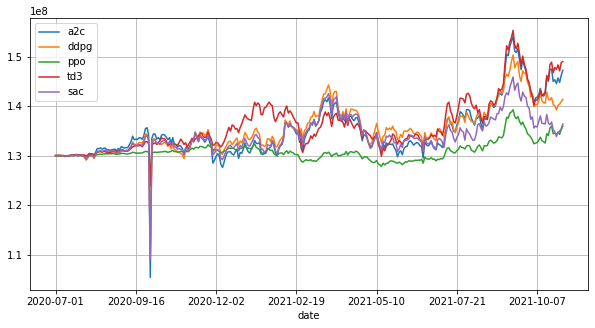

In [13]:
dftemp_baselines.plot(grid=True,figsize = (10,5))

## Offline RLs Comparison

In [14]:
df_cql_mean = dftemp_CQL.mean(axis=1)
df_iql_mean = dftemp_IQL.mean(axis=1)

In [15]:
dftemp_offline = pd.concat([df_cql_mean, df_iql_mean],axis=1)

In [16]:
dftemp_offline.columns = ["cql", "iql"]

In [17]:
cql_mean = dftemp_baselines["a2c"].mean()
iql_mean = dftemp_baselines["ddpg"].mean()
print("CQL Mean: ", cql_mean, ", IQL Mean: ", iql_mean)

CQL Mean:  134942241.64659244 , IQL Mean:  135317502.39914718


<AxesSubplot:xlabel='date'>

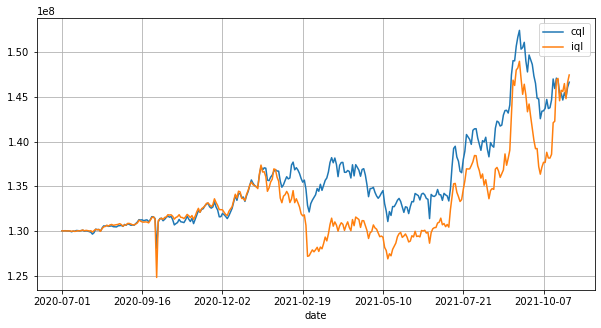

In [18]:
dftemp_offline.plot(grid=True,figsize = (10,5))

## Offline RLs vs Baseline RLs

In [19]:
dftemp_all = pd.concat([dftemp_baselines, dftemp_offline],axis=1)
dftemp_all

,a2c,ddpg,ppo,td3,sac,cql,iql
date,,,,,,,
2020-07-01,1.300000e+08,1.300000e+08,1.300000e+08,1.300000e+08,1.300000e+08,1.300000e+08,1.300000e+08
2020-07-02,1.299984e+08,1.300001e+08,1.300001e+08,1.299953e+08,1.300010e+08,1.300015e+08,1.300000e+08
2020-07-06,1.300277e+08,1.300387e+08,1.300075e+08,1.300057e+08,1.300311e+08,1.300194e+08,1.300121e+08
2020-07-07,1.299892e+08,1.299918e+08,1.300011e+08,1.300054e+08,1.300028e+08,1.299928e+08,1.300007e+08
2020-07-08,1.299728e+08,1.299851e+08,1.299977e+08,1.299813e+08,1.299921e+08,1.299895e+08,1.299909e+08
...,...,...,...,...,...,...,...
2021-10-25,1.445247e+08,1.391973e+08,1.341717e+08,1.473983e+08,1.338378e+08,1.446503e+08,1.456012e+08
2021-10-26,1.456679e+08,1.401290e+08,1.347332e+08,1.483074e+08,1.347288e+08,1.454661e+08,1.464877e+08
2021-10-27,1.447619e+08,1.404025e+08,1.342780e+08,1.471041e+08,1.349566e+08,1.449619e+08,1.448031e+08


<AxesSubplot:xlabel='date'>

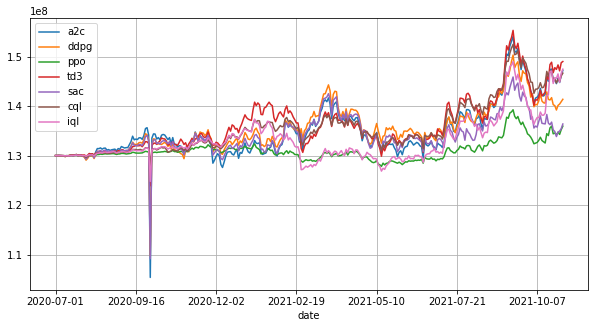

In [20]:
dftemp_all.plot(grid=True,figsize = (10,5))